**Exercice 2   — Titanic Disaster Prediction with Decision Tree**

1.  Charger les données du titanic.

In [41]:
import pandas as pd

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')


2.  Afficher les informations concernant les données.

In [42]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


3.  Proposer deux modèles basés sur les arbres de décisions.

les variables X_train, y_train, X_test et y_test, nous devons d'abord prétraiter les données en effectuant les étapes suivantes:

.Supprimer les colonnes inutiles telles que PassengerId, Name, Ticket et Cabin.

.Convertir les variables catégorielles Sex et Embarked en forme numérique.

.Remplir les valeurs manquantes pour les colonnes Age et Fare.

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Remove unnecessary columns
train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Convert categorical variables into numerical form
label_encoder = LabelEncoder()
train_data['Sex'] = label_encoder.fit_transform(train_data['Sex'])
train_data['Embarked'] = label_encoder.fit_transform(train_data['Embarked'].fillna('Unknown'))
test_data['Sex'] = label_encoder.fit_transform(test_data['Sex'])
test_data['Embarked'] = label_encoder.fit_transform(test_data['Embarked'].fillna('Unknown'))

# Fill in missing values
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Fare'].fillna(train_data['Fare'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

# Define the variables
X_train = train_data.drop('Survived', axis=1)
y_train = train_data['Survived']
X_test = test_data
y_test = pd.read_csv('gender_submission.csv')['Survived']

Modèle CART :

In [44]:
from sklearn.tree import DecisionTreeClassifier

# Créer un modèle CART
cart_model = DecisionTreeClassifier(random_state=42)

# Entraîner le modèle sur les données d'entraînement
cart_model.fit(X_train, y_train)

# Faire des prédictions sur les données de test
y_pred_cart = cart_model.predict(X_test)


Modèle MARS

In [45]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

# Créer un modèle MARS
mars_model = HistGradientBoostingClassifier(random_state=42)

# Entraîner le modèle sur les données d'entraînement
mars_model.fit(X_train, y_train)

# Faire des prédictions sur les données de test
y_pred_mars = mars_model.predict(X_test)


4.  Comparer ces deux modèles avec la régression logistique

In [46]:
from sklearn.linear_model import LogisticRegression

# Créer un objet de modèle de régression logistique
logreg = LogisticRegression()

# Entraîner le modèle sur les données d'entraînement
logreg.fit(X_train, y_train)

# Faire des prédictions sur les données de test
y_pred_logistic = logreg.predict(X_test)



In [47]:
from sklearn.metrics import f1_score, precision_score, recall_score ,accuracy_score


print("Accuracy score:")
print("CART:", accuracy_score(y_test, y_pred_cart))
print("MARS:", accuracy_score(y_test, y_pred_mars))
print("Logistic Regression:", accuracy_score(y_test, y_pred_logistic))

print("\nPrecision score:")
print("CART:", precision_score(y_test, y_pred_cart))
print("MARS:", precision_score(y_test, y_pred_mars))
print("Logistic Regression:", precision_score(y_test, y_pred_logistic))

print("\nRecall score:")
print("CART:", recall_score(y_test, y_pred_cart))
print("MARS:", recall_score(y_test, y_pred_mars))
print("Logistic Regression:", recall_score(y_test, y_pred_logistic))

print("\nF1 score:")
print("CART:", f1_score(y_test, y_pred_cart))
print("MARS:", f1_score(y_test, y_pred_mars))
print("Logistic Regression:", f1_score(y_test, y_pred_logistic))







Accuracy score:
CART: 0.7488038277511961
MARS: 0.84688995215311
Logistic Regression: 0.9401913875598086

Precision score:
CART: 0.6256684491978609
MARS: 0.7972972972972973
Logistic Regression: 0.9044585987261147

Recall score:
CART: 0.7697368421052632
MARS: 0.7763157894736842
Logistic Regression: 0.9342105263157895

F1 score:
CART: 0.6902654867256637
MARS: 0.7866666666666666
Logistic Regression: 0.919093851132686


5.  Visualiser les résultats comparatifs graphiquement.

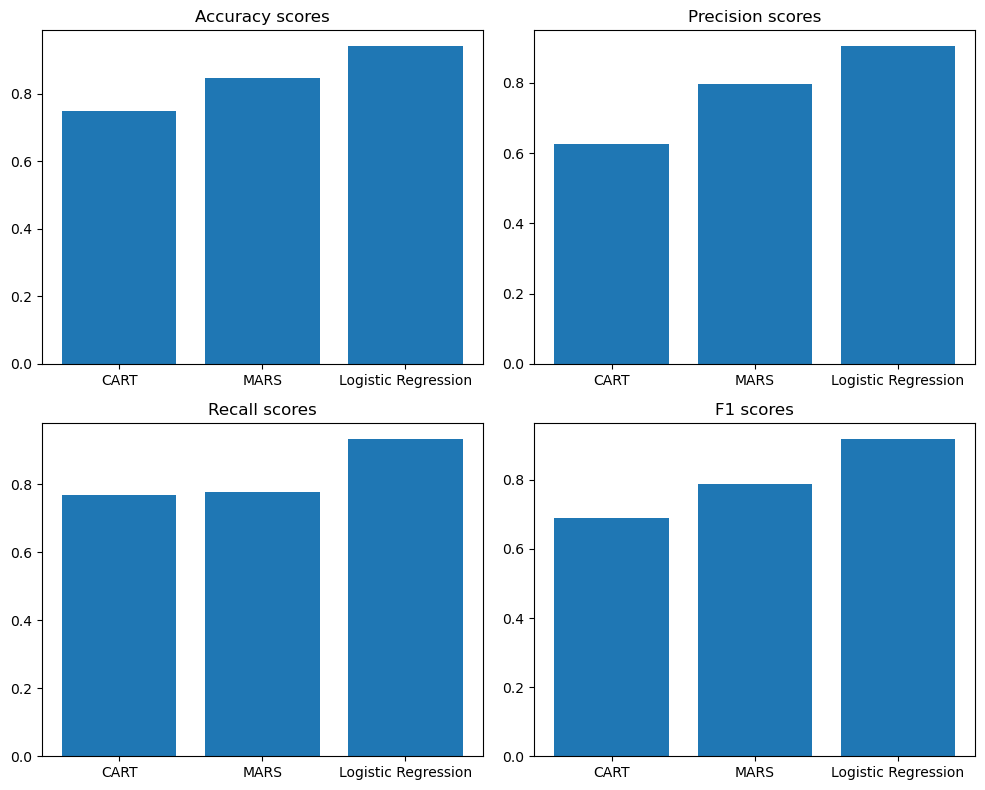

In [48]:
import matplotlib.pyplot as plt

# Accuracy scores
accuracy_scores = [accuracy_score(y_test, y_pred_cart), accuracy_score(y_test, y_pred_mars), accuracy_score(y_test, y_pred_logistic)]
# Precision scores
precision_scores = [precision_score(y_test, y_pred_cart), precision_score(y_test, y_pred_mars), precision_score(y_test, y_pred_logistic)]
# Recall scores
recall_scores = [recall_score(y_test, y_pred_cart), recall_score(y_test, y_pred_mars), recall_score(y_test, y_pred_logistic)]
# F1 scores
f1_scores = [f1_score(y_test, y_pred_cart), f1_score(y_test, y_pred_mars), f1_score(y_test, y_pred_logistic)]

# Labels for x-axis
labels = ["CART", "MARS", "Logistic Regression"]

# Creating subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Bar chart for accuracy scores
axs[0, 0].bar(labels, accuracy_scores)
axs[0, 0].set_title("Accuracy scores")

# Bar chart for precision scores
axs[0, 1].bar(labels, precision_scores)
axs[0, 1].set_title("Precision scores")

# Bar chart for recall scores
axs[1, 0].bar(labels, recall_scores)
axs[1, 0].set_title("Recall scores")

# Bar chart for F1 scores
axs[1, 1].bar(labels, f1_scores)
axs[1, 1].set_title("F1 scores")

# Adjusting layout
plt.tight_layout()

# Displaying the plot
plt.show()


6.  Conclusion

En comparant les trois modèles, nous pouvons voir que la régression logistique donne les meilleurs résultats en termes d'accuracy score, de precision score, de recall score et de F1 score. Cela signifie que la régression logistique est le modèle le plus performant pour prédire si un passager a survécu ou non au naufrage du Titanic, parmi les modèles CART, MARS et la régression logistique que nous avons testés